In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
from pathlib import Path
# Make sure the notebook can import both this repo and ciceroscm
PROJECT_ROOT = Path("..").resolve()
sys.path.insert(0, str(PROJECT_ROOT))
sys.path.insert(0, str(PROJECT_ROOT / "ciceroscm" / "src"))

from plot_utils import plot_training_time_and_speedup, plot_train_reward, _extract_lever_table, _extract_adaptation_table, plot_lever_consistency,plot_lever_consistency_mean

## 1. Load results

### 1.1 CICERO-SCM

#### 1.1.1 Homogenous

In [2]:
homogenous_scm_results_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/marl_results/paper_20251003_100842_scm_homogenous_agents/marl_experiment_results_intermediate.json"

with open(homogenous_scm_results_path, "r") as f:
    scm_results_homogenous = json.load(f)

homogenous_scm_training_time = pd.DataFrame.from_dict(scm_results_homogenous["training_time_stats"], orient="index", columns=["value"])
homogenous_scm_greedy_reward = pd.DataFrame.from_dict(scm_results_homogenous["greedy_reward"], orient="index")
homogenous_scm_train_reward = pd.DataFrame.from_dict(scm_results_homogenous["train_reward"], orient="index")

homogenous_scm_greedy_policy = scm_results_homogenous["greedy_policy"]

homogenous_scm_energy       = _extract_lever_table(homogenous_scm_greedy_policy, "energy")
homogenous_scm_methane      = _extract_lever_table(homogenous_scm_greedy_policy, "methane")
homogenous_scm_agriculture  = _extract_lever_table(homogenous_scm_greedy_policy, "agriculture")
homogenous_scm_adaptation   = _extract_adaptation_table(homogenous_scm_greedy_policy)

### 1.2 GRU

#### 1.2.1 Homogenous

In [3]:
homogenous_gru_results_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/marl_results/paper_accuracy_20251006_152956_20251002_081632_gru_128_1_homogenous_agents/marl_experiment_results_intermediate.json"

with open(homogenous_gru_results_path, "r") as f:
    gru_results_homogenous = json.load(f)

homogenous_gru_training_time = pd.DataFrame.from_dict(gru_results_homogenous["training_time_stats"], orient="index", columns=["value"])
homogenous_gru_greedy_reward = pd.DataFrame.from_dict(gru_results_homogenous["greedy_reward"], orient="index")
homogenous_gru_train_reward = pd.DataFrame.from_dict(gru_results_homogenous["train_reward"], orient="index")

homogenous_gru_greedy_policy = gru_results_homogenous["greedy_policy"]

homogenous_gru_energy       = _extract_lever_table(homogenous_gru_greedy_policy, "energy")
homogenous_gru_methane      = _extract_lever_table(homogenous_gru_greedy_policy, "methane")
homogenous_gru_agriculture  = _extract_lever_table(homogenous_gru_greedy_policy, "agriculture")
homogenous_gru_adaptation   = _extract_adaptation_table(homogenous_gru_greedy_policy)

#### 1.2.2 Heterogenous

In [4]:
heterogenous_gru_results_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/marl_results/paper_accuracy_hetero_20251007_085822_20251002_081632_gru_128_1_heterogenous_agents/marl_experiment_results_intermediate.json"

with open(heterogenous_gru_results_path, "r") as f:
    gru_results_heterogenous = json.load(f)

### NET
heterogenous_gru_training_time = pd.DataFrame.from_dict(gru_results_heterogenous["training_time_stats"], orient="index", columns=["value"])
heterogenous_gru_greedy_reward = pd.DataFrame.from_dict(gru_results_heterogenous["greedy_reward"], orient="index")
heterogenous_gru_train_reward = pd.DataFrame.from_dict(gru_results_heterogenous["train_reward"], orient="index")
heterogenous_gru_greedy_policy = gru_results_heterogenous["greedy_policy"]

heterogenous_gru_energy       = _extract_lever_table(heterogenous_gru_greedy_policy, "energy")
heterogenous_gru_methane      = _extract_lever_table(heterogenous_gru_greedy_policy, "methane")
heterogenous_gru_agriculture  = _extract_lever_table(heterogenous_gru_greedy_policy, "agriculture")
heterogenous_gru_adaptation   = _extract_adaptation_table(heterogenous_gru_greedy_policy)

### 1.3 LSTM

#### 1.2.1 Homogenous

In [5]:
homogenous_lstm_results_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/marl_results/paper_accuracy_20251006_164504_20251001_104419_lstm_128_1_homogenous_agents/marl_experiment_results_intermediate.json"

with open(homogenous_lstm_results_path, "r") as f:
    lstm_results_homogenous = json.load(f)

homogenous_lstm_training_time = pd.DataFrame.from_dict(lstm_results_homogenous["training_time_stats"], orient="index", columns=["value"])
homogenous_lstm_greedy_reward = pd.DataFrame.from_dict(lstm_results_homogenous["greedy_reward"], orient="index")
homogenous_lstm_train_reward = pd.DataFrame.from_dict(lstm_results_homogenous["train_reward"], orient="index")

homogenous_lstm_greedy_policy = lstm_results_homogenous["greedy_policy"]

homogenous_lstm_energy       = _extract_lever_table(homogenous_lstm_greedy_policy, "energy")
homogenous_lstm_methane      = _extract_lever_table(homogenous_lstm_greedy_policy, "methane")
homogenous_lstm_agriculture  = _extract_lever_table(homogenous_lstm_greedy_policy, "agriculture")
homogenous_lstm_adaptation   = _extract_adaptation_table(homogenous_lstm_greedy_policy)

#### 1.2.2 Heterogenous

In [6]:
heterogenous_lstm_results_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/marl_results/paper_accuracy_hetero_20251007_085630_20251001_104419_lstm_128_1_heterogenous_agents/marl_experiment_results_intermediate.json"

with open(heterogenous_lstm_results_path, "r") as f:
    lstm_results_heterogenous = json.load(f)

### NET
heterogenous_lstm_training_time = pd.DataFrame.from_dict(lstm_results_heterogenous["training_time_stats"], orient="index", columns=["value"])
heterogenous_lstm_greedy_reward = pd.DataFrame.from_dict(lstm_results_heterogenous["greedy_reward"], orient="index")
heterogenous_lstm_train_reward = pd.DataFrame.from_dict(lstm_results_heterogenous["train_reward"], orient="index")
heterogenous_lstm_greedy_policy = lstm_results_heterogenous["greedy_policy"]

heterogenous_lstm_energy       = _extract_lever_table(heterogenous_lstm_greedy_policy, "energy")
heterogenous_lstm_methane      = _extract_lever_table(heterogenous_lstm_greedy_policy, "methane")
heterogenous_lstm_agriculture  = _extract_lever_table(heterogenous_lstm_greedy_policy, "agriculture")
heterogenous_lstm_adaptation   = _extract_adaptation_table(heterogenous_lstm_greedy_policy)

### 1.4 TCN

#### 1.2.1 Homogenous

In [7]:
homogenous_tcn_results_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/marl_results/paper_accuracy_20251006_154912_20251006_125016_tcn_128_5_homogenous_agents/marl_experiment_results_intermediate.json"

with open(homogenous_tcn_results_path, "r") as f:
    tcn_results_homogenous = json.load(f)

homogenous_tcn_training_time = pd.DataFrame.from_dict(tcn_results_homogenous["training_time_stats"], orient="index", columns=["value"])
homogenous_tcn_greedy_reward = pd.DataFrame.from_dict(tcn_results_homogenous["greedy_reward"], orient="index")
homogenous_tcn_train_reward = pd.DataFrame.from_dict(tcn_results_homogenous["train_reward"], orient="index")

homogenous_tcn_greedy_policy = tcn_results_homogenous["greedy_policy"]

homogenous_tcn_energy       = _extract_lever_table(homogenous_tcn_greedy_policy, "energy")
homogenous_tcn_methane      = _extract_lever_table(homogenous_tcn_greedy_policy, "methane")
homogenous_tcn_agriculture  = _extract_lever_table(homogenous_tcn_greedy_policy, "agriculture")
homogenous_tcn_adaptation   = _extract_adaptation_table(homogenous_tcn_greedy_policy)

#### 1.2.2 Heterogenous

In [8]:
heterogenous_tcn_results_path = "/home/obola/repositories/cicero-scm-surrogate/data/20250930_223742/marl_results/paper_accuracy_hetero_20251007_085957_20251006_125016_tcn_128_5_heterogenous_agents/marl_experiment_results_intermediate.json"

with open(heterogenous_tcn_results_path, "r") as f:
    tcn_results_heterogenous = json.load(f)

### NET
heterogenous_tcn_training_time = pd.DataFrame.from_dict(tcn_results_heterogenous["training_time_stats"], orient="index", columns=["value"])
heterogenous_tcn_greedy_reward = pd.DataFrame.from_dict(tcn_results_heterogenous["greedy_reward"], orient="index")
heterogenous_tcn_train_reward = pd.DataFrame.from_dict(tcn_results_heterogenous["train_reward"], orient="index")
heterogenous_tcn_greedy_policy = tcn_results_heterogenous["greedy_policy"]

heterogenous_tcn_energy       = _extract_lever_table(heterogenous_tcn_greedy_policy, "energy")
heterogenous_tcn_methane      = _extract_lever_table(heterogenous_tcn_greedy_policy, "methane")
heterogenous_tcn_agriculture  = _extract_lever_table(heterogenous_tcn_greedy_policy, "agriculture")
heterogenous_tcn_adaptation   = _extract_adaptation_table(heterogenous_tcn_greedy_policy)

## 2. Charts and figures

### 2.1 Training time

#### 2.1.1 GRU

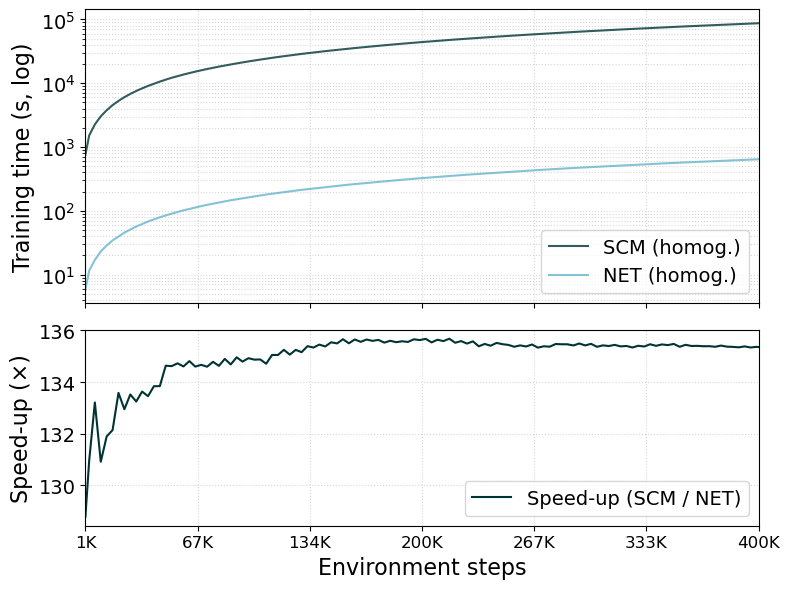

In [9]:
fig, axes = plot_training_time_and_speedup(
    homogenous_scm_training_time,
    homogenous_gru_training_time,
    cmap="ocean",
    savefig="plots/training_time_comparison_gru_cicero.pdf",
    xmax=400_000,
)

#### 2.1.2 LSTM

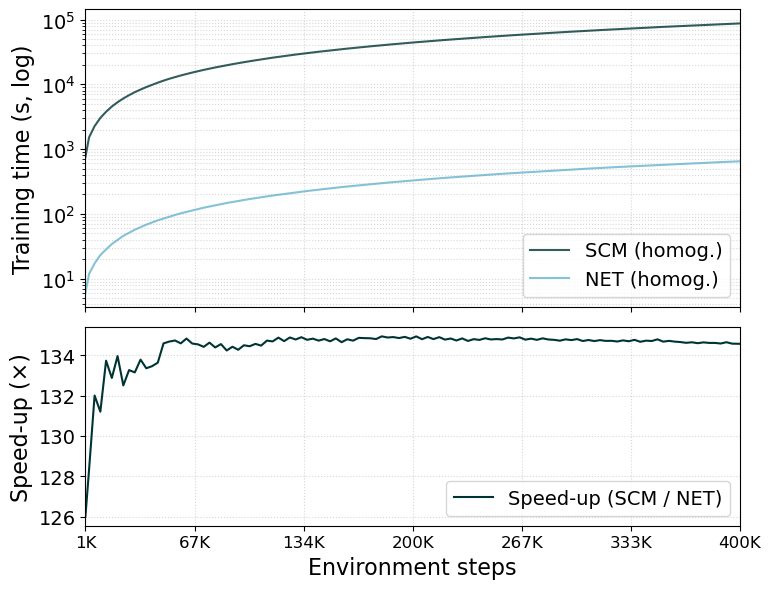

In [10]:
fig, axes = plot_training_time_and_speedup(
    homogenous_scm_training_time,
    homogenous_lstm_training_time,
    cmap="ocean",
    savefig="plots/training_time_comparison_lstm_cicero.pdf",
    xmax=400_000,
)

#### 2.1.3 TCN

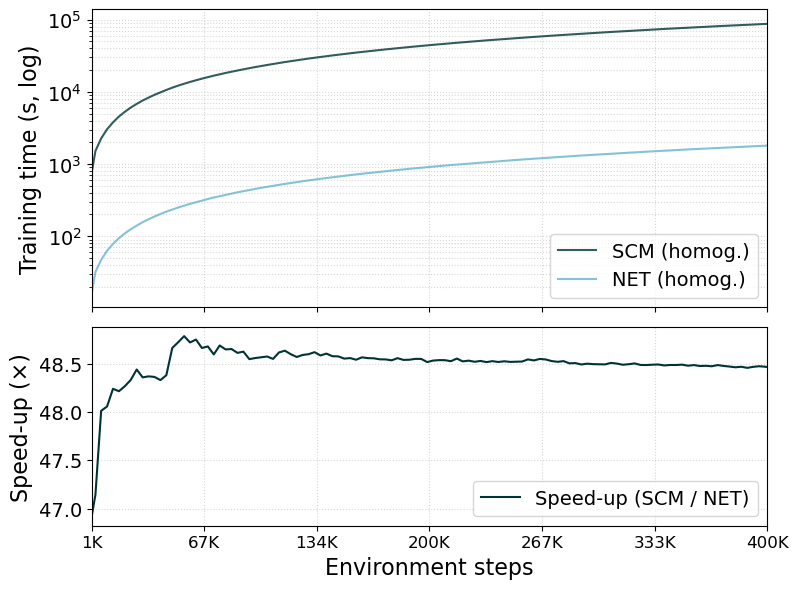

In [11]:
fig, axes = plot_training_time_and_speedup(
    homogenous_scm_training_time,
    homogenous_tcn_training_time,
    cmap="ocean",
    savefig="plots/training_time_comparison_tcn_cicero.pdf",
    xmax=400_000,
)

### 2.2 Reward over training steps

#### 2.1.1 GRU

##### 2.1.1.1 Homogenous

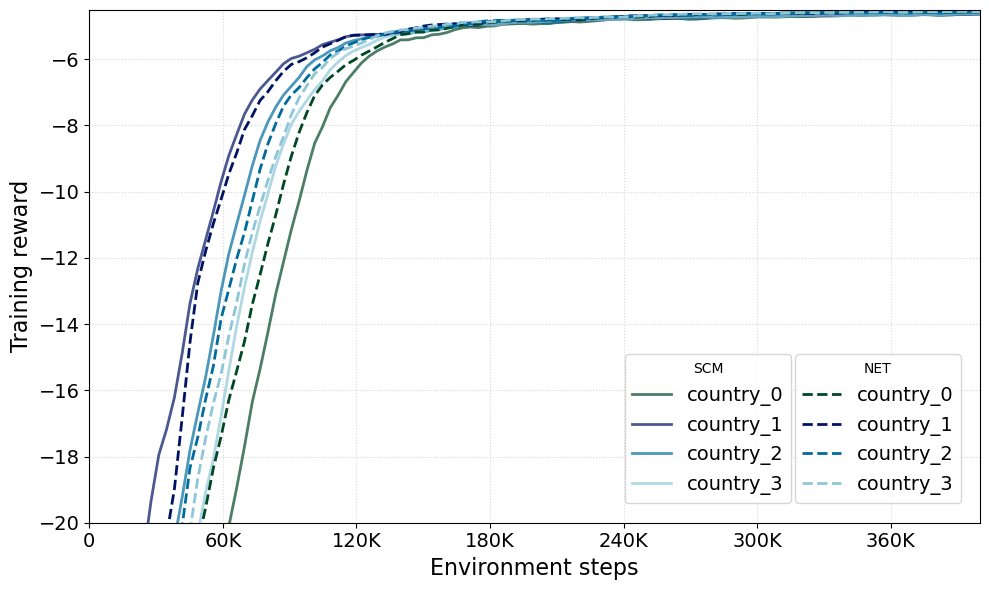

(<Figure size 1000x600 with 1 Axes>,
 <Axes: xlabel='Environment steps', ylabel='Training reward'>)

In [12]:
plot_train_reward(homogenous_scm_train_reward, homogenous_gru_train_reward, steps_max=400_000,cmap="ocean", y_min = -20, savefig="plots/training_reward_comparison_gru_cicero.pdf")

##### 2.1.1.2 Heterogenous

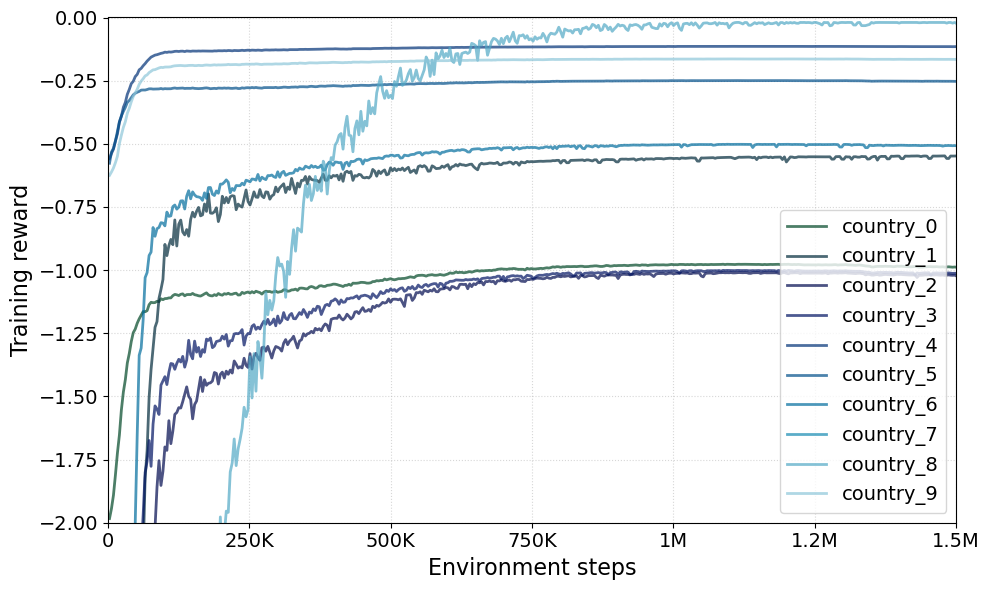

(<Figure size 1000x600 with 1 Axes>,
 <Axes: xlabel='Environment steps', ylabel='Training reward'>)

In [13]:
plot_train_reward(heterogenous_gru_train_reward, steps_max=1_500_000,cmap="ocean", y_min = -2, y_max =0, savefig="plots/training_reward_gru_heterogenous.pdf")

#### 2.1.1 LSTM

##### 2.1.1.1 Homogenous

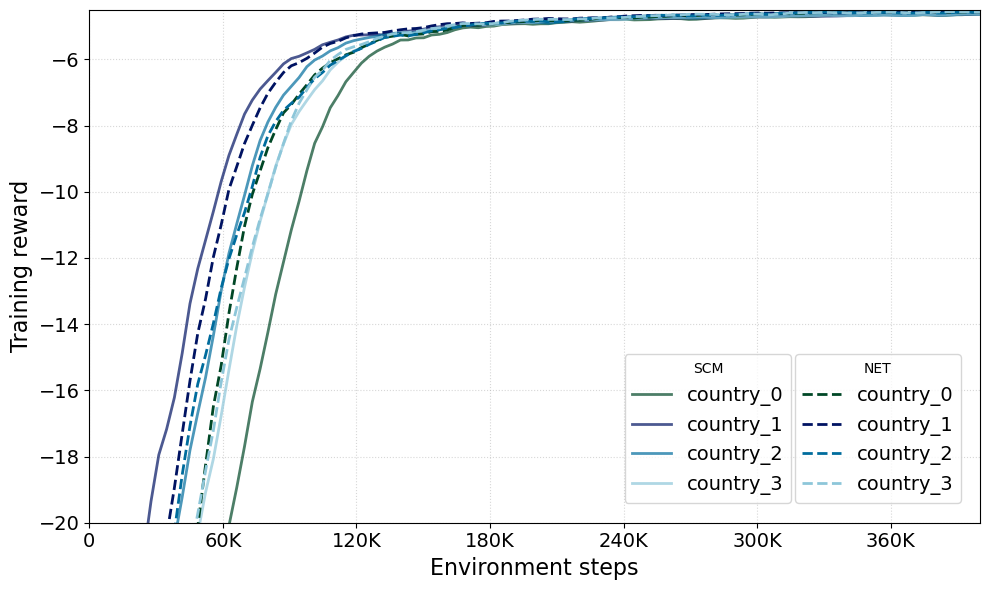

(<Figure size 1000x600 with 1 Axes>,
 <Axes: xlabel='Environment steps', ylabel='Training reward'>)

In [14]:
plot_train_reward(homogenous_scm_train_reward, homogenous_lstm_train_reward, steps_max=400_000,cmap="ocean", y_min = -20, savefig="plots/training_reward_comparison_lstm_cicero.pdf")

##### 2.1.1.2 Heterogenous

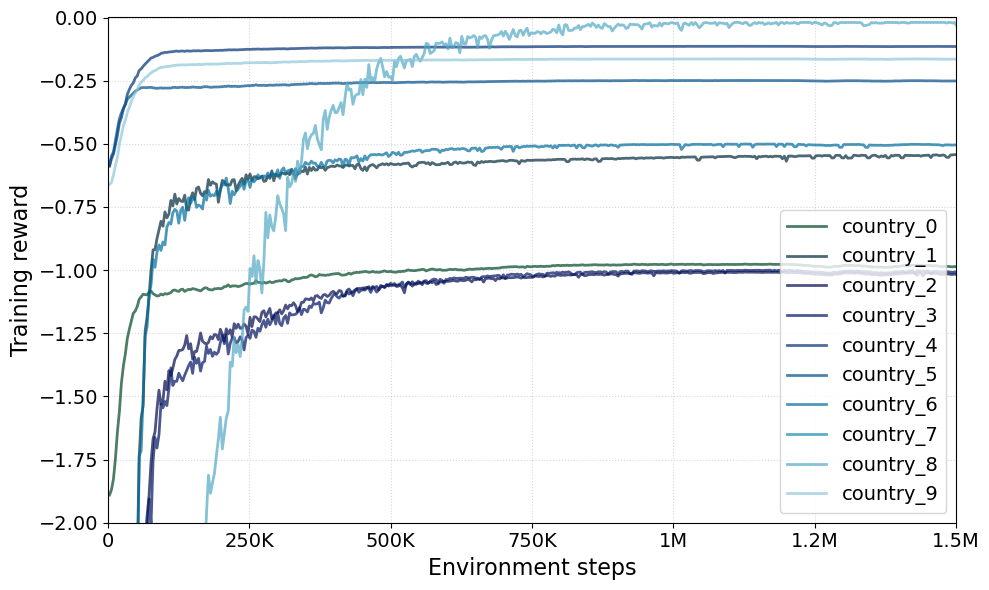

(<Figure size 1000x600 with 1 Axes>,
 <Axes: xlabel='Environment steps', ylabel='Training reward'>)

In [15]:
plot_train_reward(heterogenous_lstm_train_reward, steps_max=1_500_000,cmap="ocean", y_min = -2, y_max =0, savefig="plots/training_reward_lstm_heterogenous.pdf")

#### 2.1.1 LSTM

##### 2.1.1.1 Homogenous

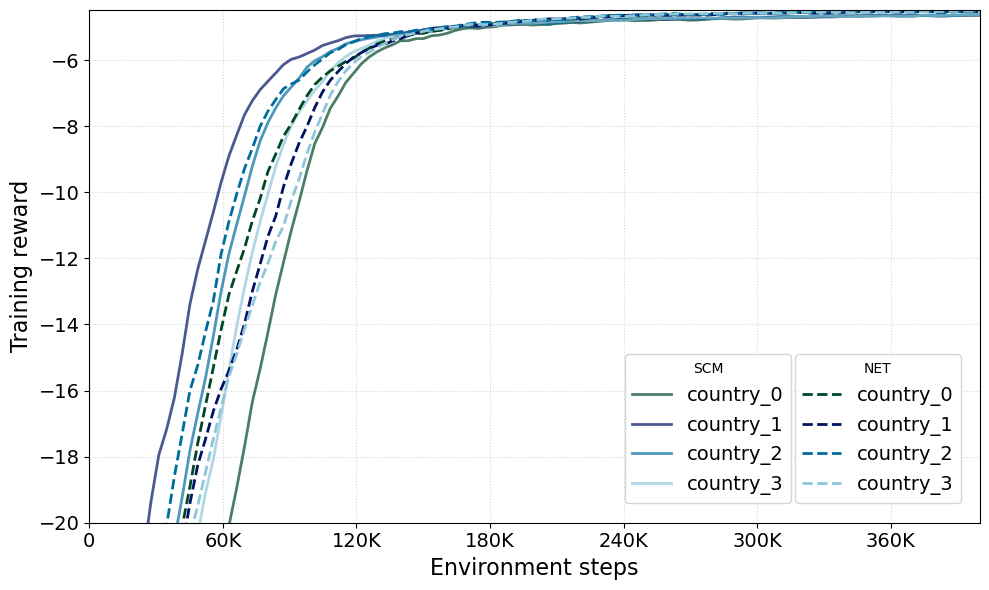

(<Figure size 1000x600 with 1 Axes>,
 <Axes: xlabel='Environment steps', ylabel='Training reward'>)

In [16]:
plot_train_reward(homogenous_scm_train_reward, homogenous_tcn_train_reward, steps_max=400_000,cmap="ocean", y_min = -20, savefig="plots/training_reward_comparison_tcn_cicero.pdf")

##### 2.1.1.2 Heterogenous

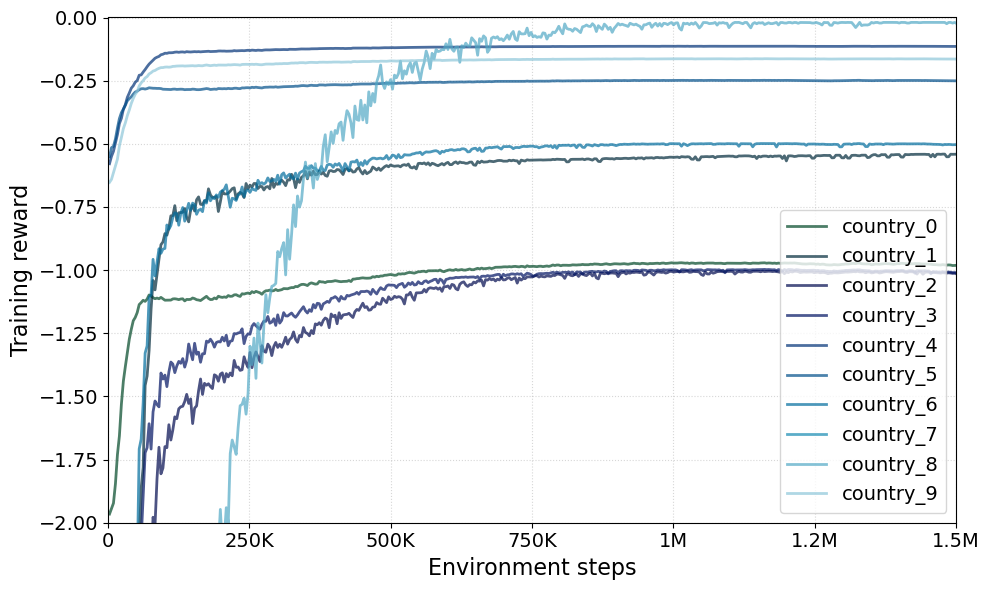

(<Figure size 1000x600 with 1 Axes>,
 <Axes: xlabel='Environment steps', ylabel='Training reward'>)

In [17]:
plot_train_reward(heterogenous_tcn_train_reward, steps_max=1_500_000,cmap="ocean", y_min = -2, y_max =0, savefig="plots/training_reward_tcn_heterogenous.pdf")

### 2.3 Policy consistency

#### 2.3.1 GRU

##### 2.3.1.1 Homogenous

(<Figure size 1200x1400 with 4 Axes>,
 array([<Axes: ylabel='Energy (fraction)'>,
        <Axes: ylabel='Methane (fraction)'>,
        <Axes: ylabel='Agriculture (fraction)'>,
        <Axes: xlabel='Environment steps', ylabel='Adaptation (fraction)'>],
       dtype=object))

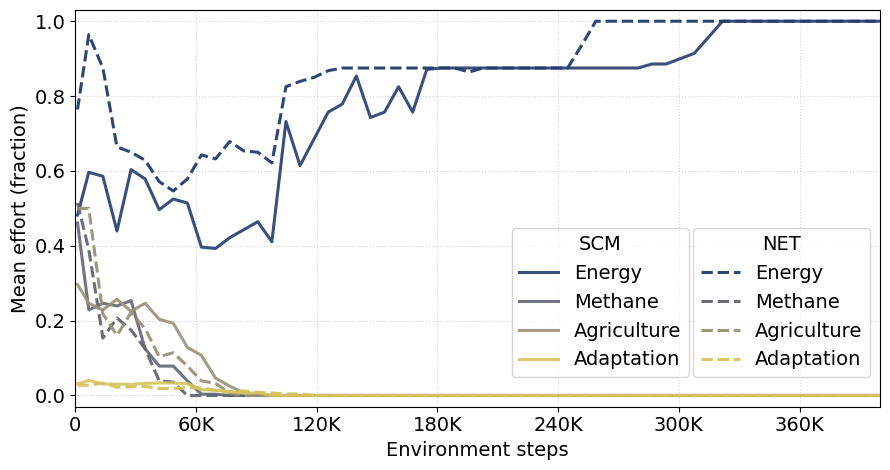

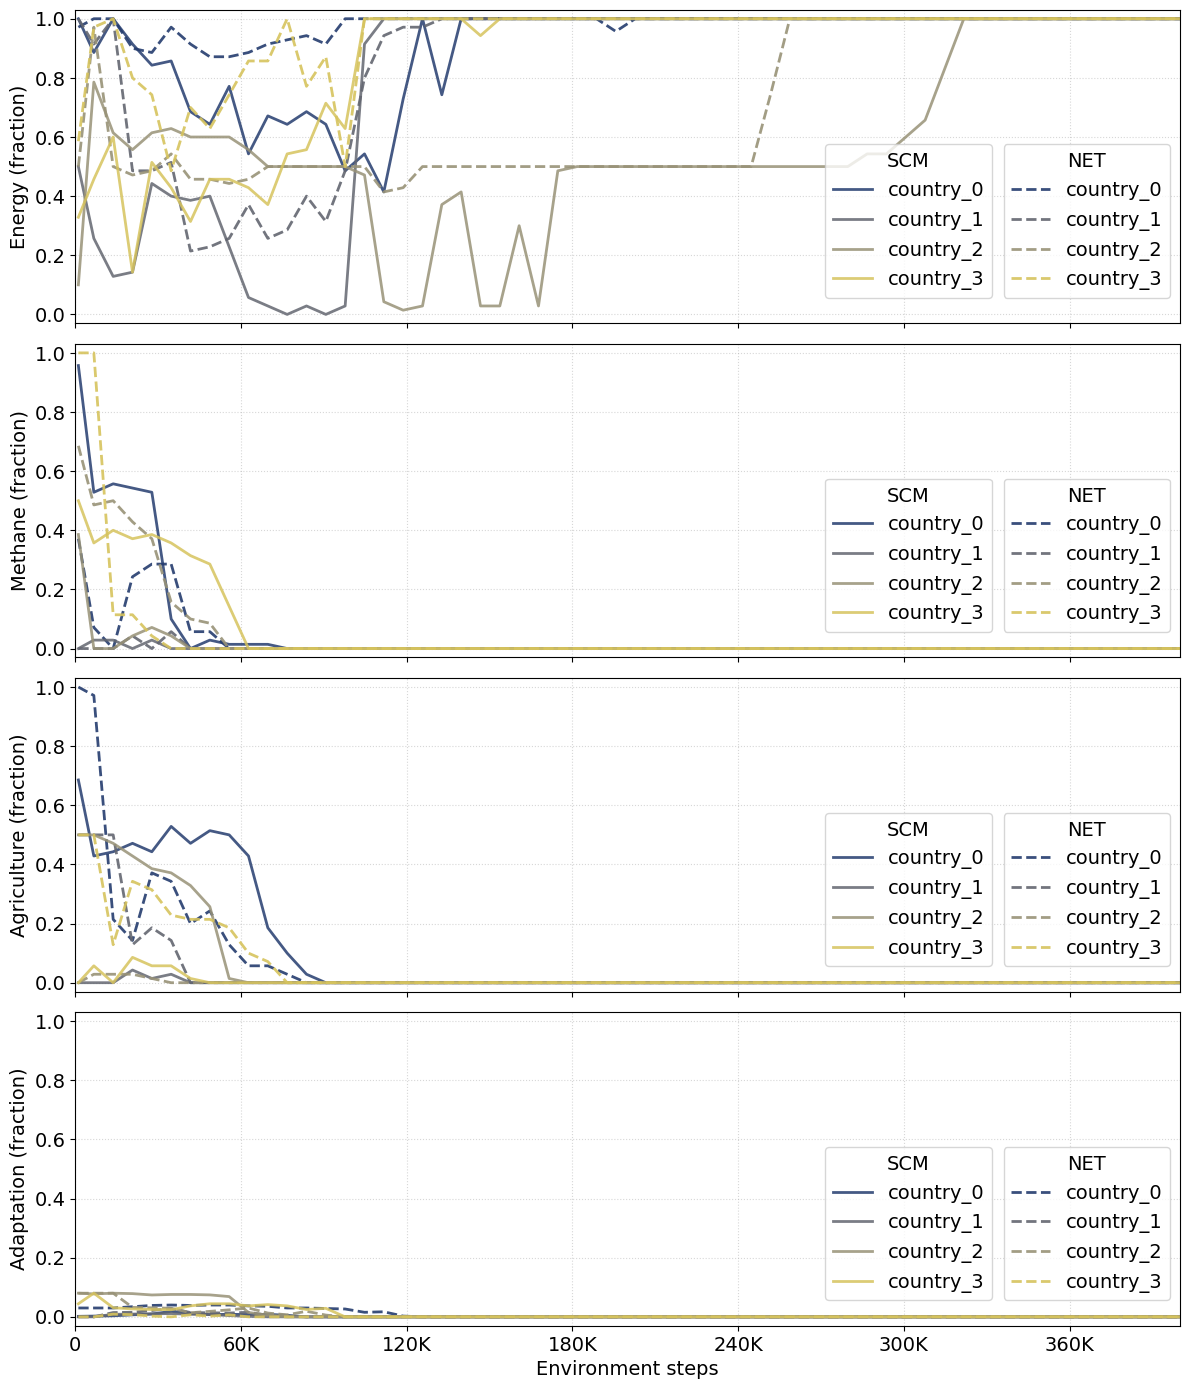

In [18]:
lever_series = {
    "energy": (homogenous_scm_energy,homogenous_gru_energy),
    "methane": (homogenous_scm_methane,homogenous_gru_methane),
    "agriculture": (homogenous_scm_agriculture, homogenous_gru_agriculture),
    "adaptation": (homogenous_scm_adaptation, homogenous_gru_adaptation),
}

fig, ax = plot_lever_consistency_mean(
    lever_series,
    agent_mask=[1,1,1,1],           # include all agents
    action_mask=[1,1,1,1],          # include all levers
    steps_max=400_000,
    savefig="plots/lever_mean_consistency_gru_vs_cicero.pdf",
    y_min=-0.03, 
    y_max=1.03,
)


plot_lever_consistency(lever_series, 
                                agent_mask=[1,1,1,1],           # include all agents
                                action_mask=[1,1,1,1],          # include all levers
                                 steps_max=400_000,
                                 savefig="plots/per_agent_levers_consistency_gru_vs_cicero.pdf", 
                                 max_legend_labels=10,
                                 y_min=-0.03,
                                 y_max=1.03)

##### 2.3.1.2 Heterogenous

(<Figure size 1200x1400 with 4 Axes>,
 array([<Axes: ylabel='Energy (fraction)'>,
        <Axes: ylabel='Methane (fraction)'>,
        <Axes: ylabel='Agriculture (fraction)'>,
        <Axes: xlabel='Environment steps', ylabel='Adaptation (fraction)'>],
       dtype=object))

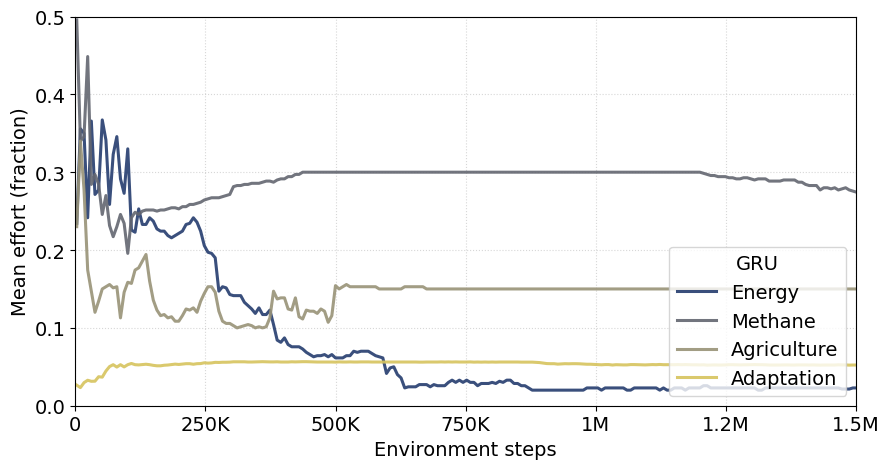

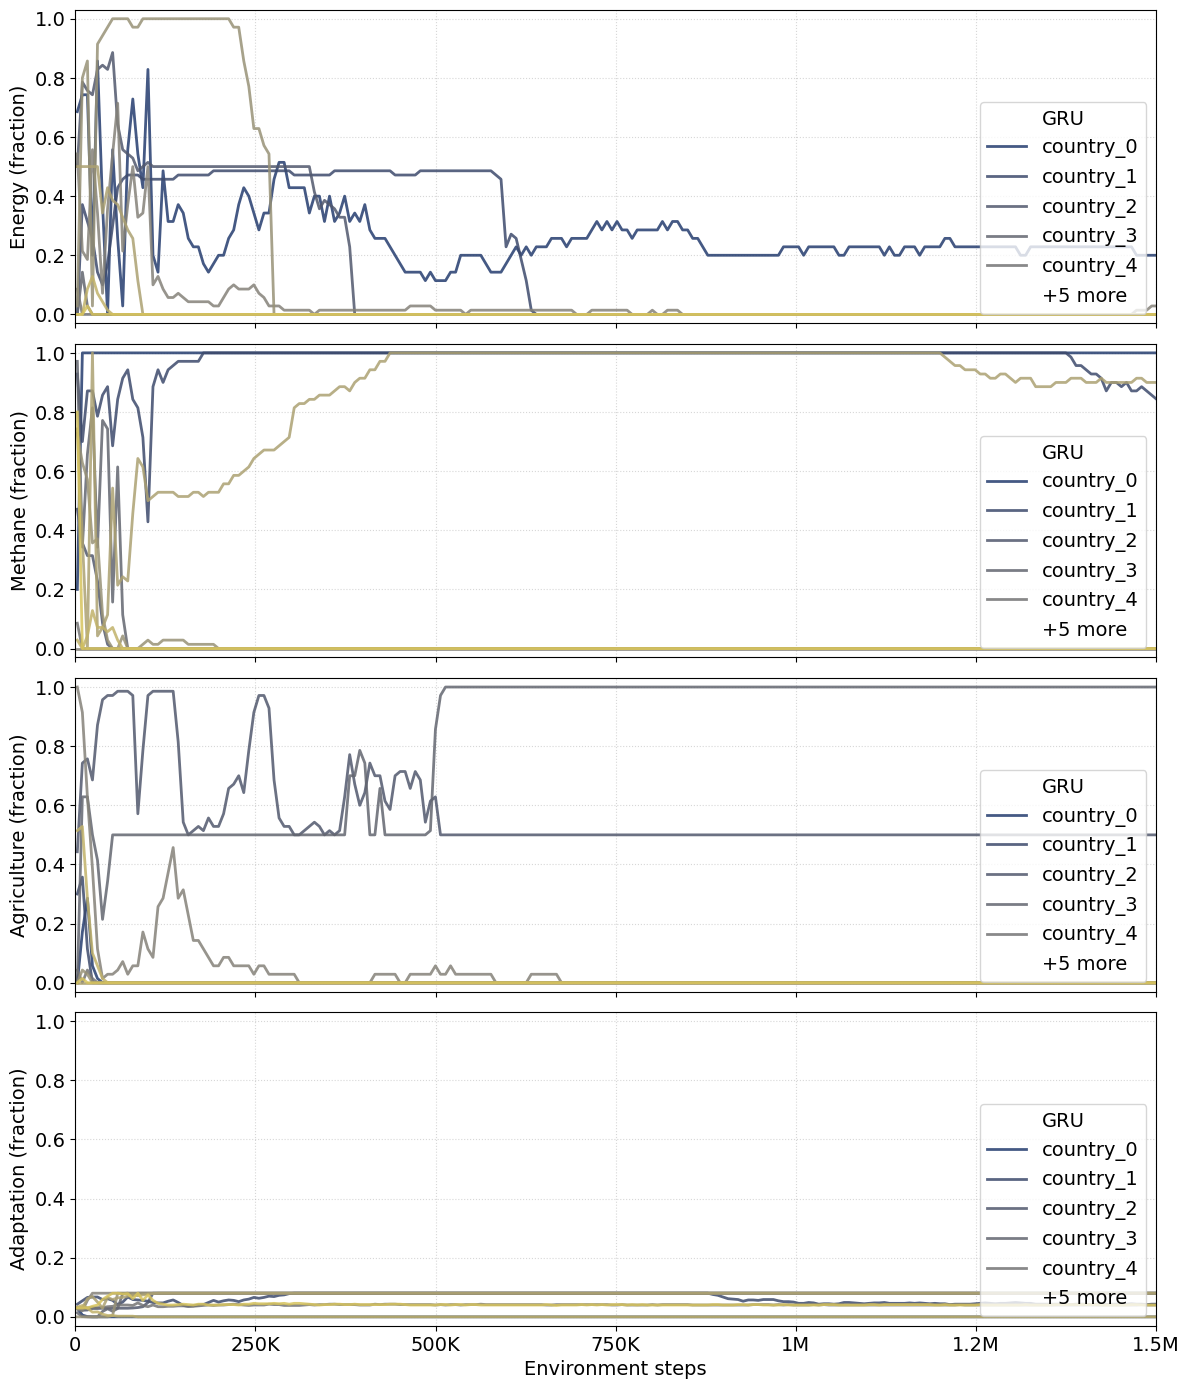

In [19]:
lever_series = {
    "energy": (heterogenous_gru_energy),
    "methane": (heterogenous_gru_methane),
    "agriculture": (heterogenous_gru_agriculture),
    "adaptation": (heterogenous_gru_adaptation),
}

fig, ax = plot_lever_consistency_mean(
    lever_series,
    agent_mask=[1,1,1,1,1,1,1,1,1,1],           # include all agents
    action_mask=[1,1,1,1],          # include all levers
    steps_max=1_500_000,
    savefig="plots/lever_consistency_gru_heterogenous.pdf",
    y_min=0,
    y_max=0.5,
    primary_label="GRU"
)

plot_lever_consistency(lever_series, 
                                agent_mask=[1,1,1,1,1,1,1,1,1,1],           # include all agents
                                action_mask=[1,1,1,1],          # include all levers
                                 steps_max=1_500_000,
                                 savefig="plots/per_agent_levers_heterogenous_gru.pdf", 
                                 max_legend_labels=5,
                                 y_min=-0.03,
                                 y_max=1.03,
                                 primary_label="GRU")

#### 2.3.2 LSTM

##### 2.3.2.1 Homogenous

(<Figure size 1200x1400 with 4 Axes>,
 array([<Axes: ylabel='Energy (fraction)'>,
        <Axes: ylabel='Methane (fraction)'>,
        <Axes: ylabel='Agriculture (fraction)'>,
        <Axes: xlabel='Environment steps', ylabel='Adaptation (fraction)'>],
       dtype=object))

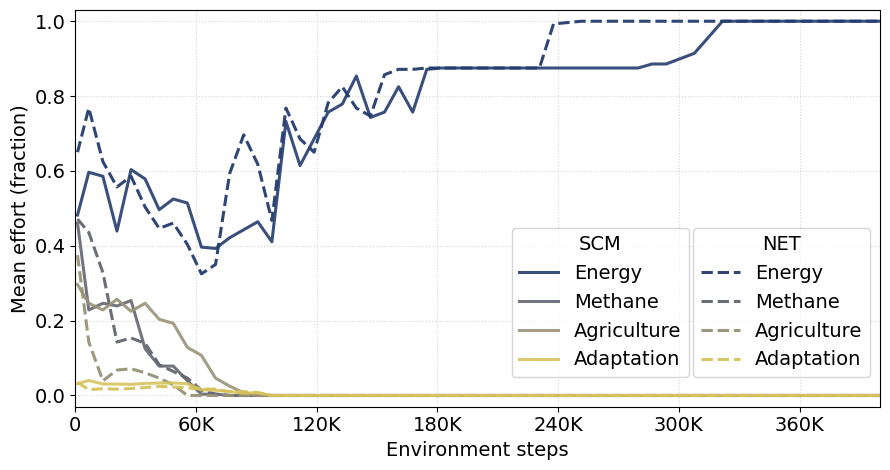

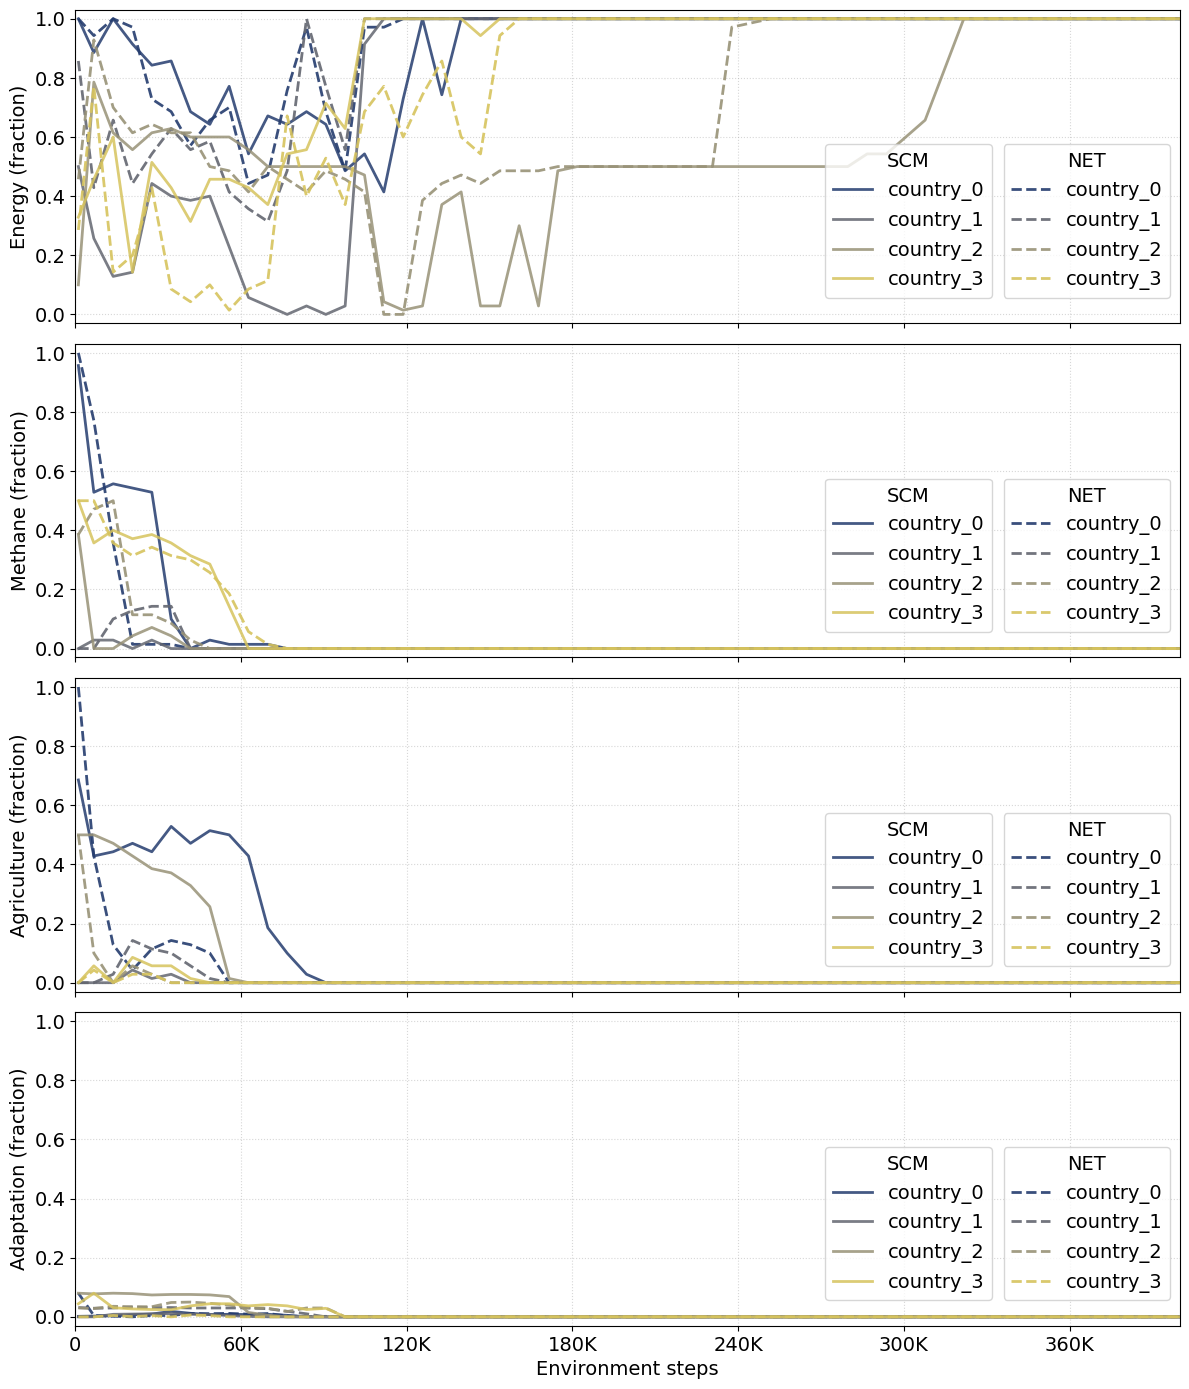

In [20]:
lever_series = {
    "energy": (homogenous_scm_energy,homogenous_lstm_energy),
    "methane": (homogenous_scm_methane,homogenous_lstm_methane),
    "agriculture": (homogenous_scm_agriculture, homogenous_lstm_agriculture),
    "adaptation": (homogenous_scm_adaptation, homogenous_lstm_adaptation),
}

fig, ax = plot_lever_consistency_mean(
    lever_series,
    agent_mask=[1,1,1,1],           # include all agents
    action_mask=[1,1,1,1],          # include all levers
    steps_max=400_000,
    savefig="plots/lever_mean_consistency_lstm_vs_cicero.pdf",
    y_min=-0.03, 
    y_max=1.03,
)

plot_lever_consistency(lever_series, 
                                agent_mask=[1,1,1,1],           # include all agents
                                action_mask=[1,1,1,1],          # include all levers
                                 steps_max=400_000,
                                 savefig="plots/per_agent_levers_consistency_lstm_vs_cicero.pdf", 
                                 max_legend_labels=10,
                                 y_min=-0.03,
                                 y_max=1.03)

##### 2.3.2.2 Heterogenous

(<Figure size 1200x1400 with 4 Axes>,
 array([<Axes: ylabel='Energy (fraction)'>,
        <Axes: ylabel='Methane (fraction)'>,
        <Axes: ylabel='Agriculture (fraction)'>,
        <Axes: xlabel='Environment steps', ylabel='Adaptation (fraction)'>],
       dtype=object))

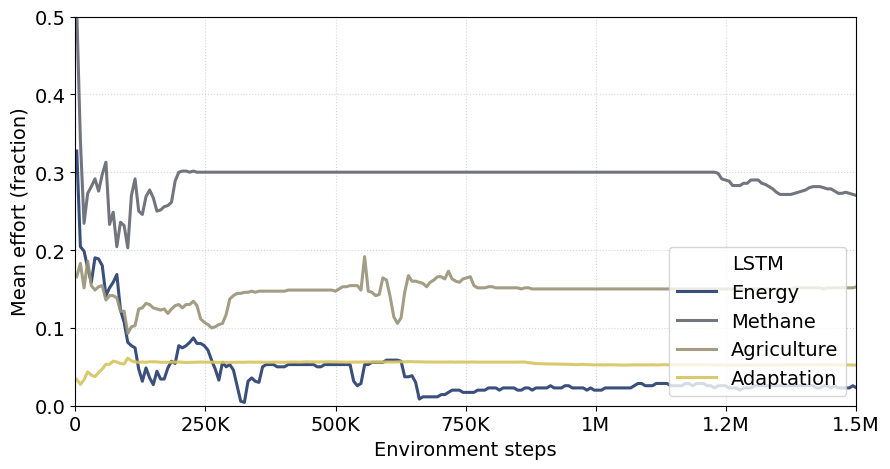

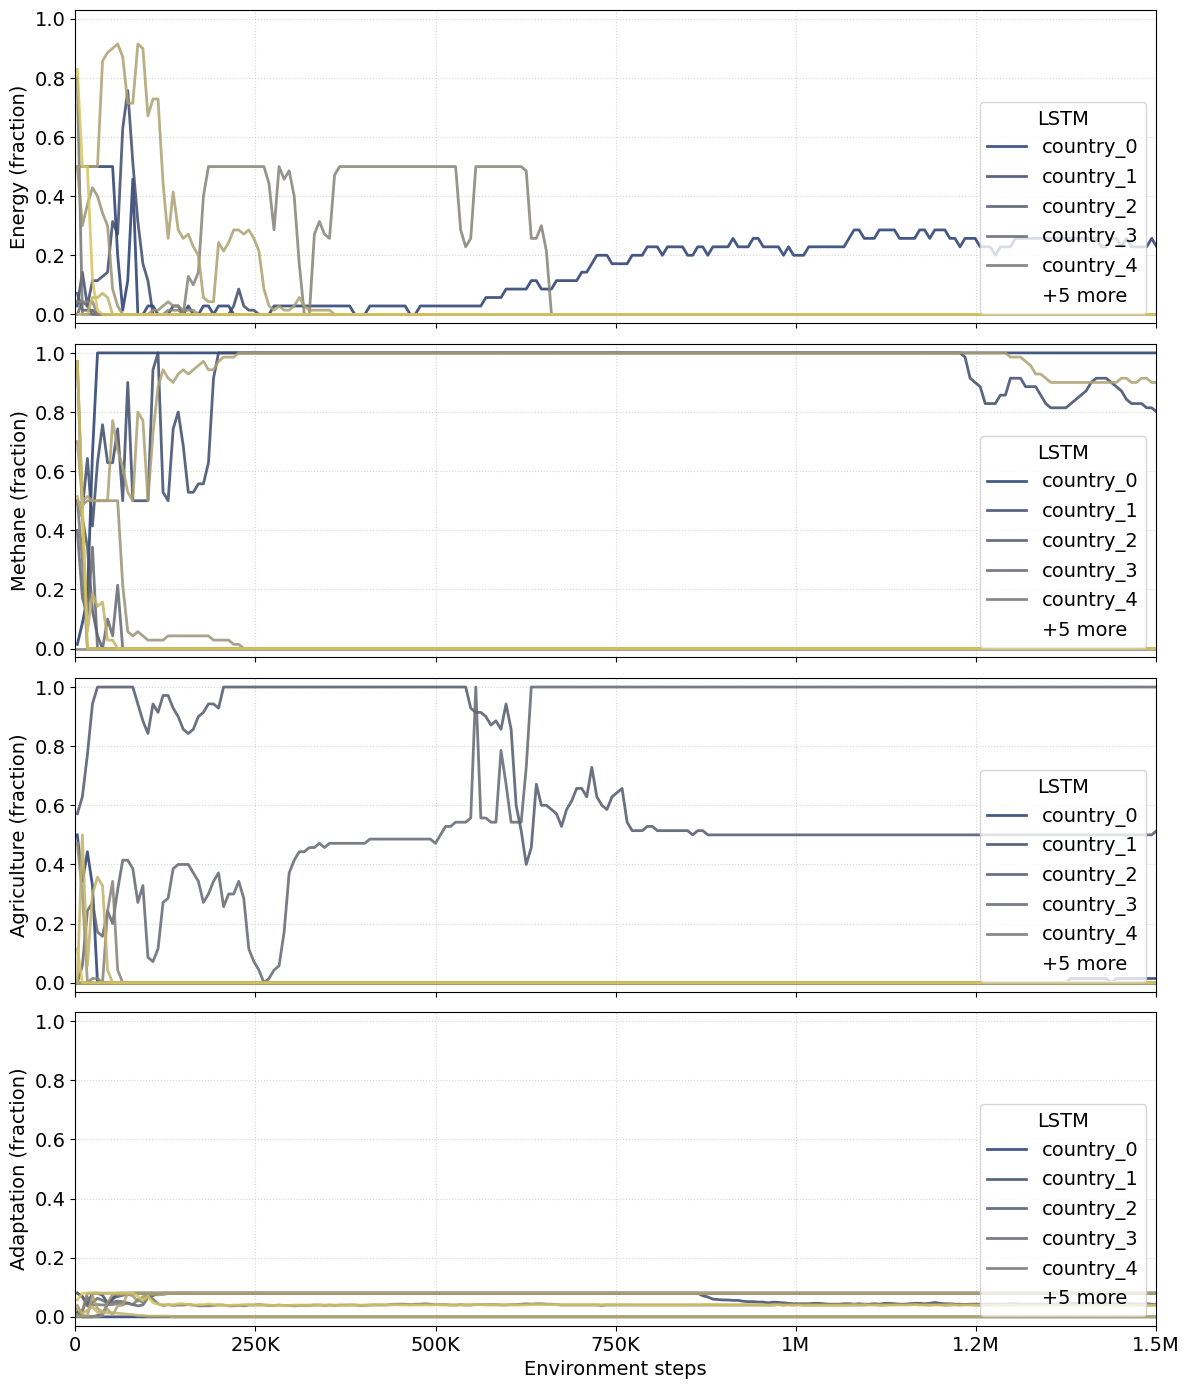

In [21]:
lever_series = {
    "energy": (heterogenous_lstm_energy),
    "methane": (heterogenous_lstm_methane),
    "agriculture": (heterogenous_lstm_agriculture),
    "adaptation": (heterogenous_lstm_adaptation),
}

fig, ax = plot_lever_consistency_mean(
    lever_series,
    agent_mask=[1,1,1,1,1,1,1,1,1,1],           # include all agents
    action_mask=[1,1,1,1],          # include all levers
    steps_max=1_500_000,
    savefig="plots/lever_consistency_lstm_heterogenous.pdf",
    y_min=0,
    y_max=0.5,
    primary_label="LSTM"
)


plot_lever_consistency(lever_series, 
                                agent_mask=[1,1,1,1,1,1,1,1,1,1],           # include all agents
                                action_mask=[1,1,1,1],          # include all levers
                                 steps_max=1_500_000,
                                 savefig="plots/per_agent_levers_heterogenous_lstm.pdf", 
                                 max_legend_labels=5,
                                 y_min=-0.03,
                                 y_max=1.03,
                                 primary_label="LSTM")

#### 2.3.3 TCN

##### 2.3.3.1 Homogenous

(<Figure size 1200x1400 with 4 Axes>,
 array([<Axes: ylabel='Energy (fraction)'>,
        <Axes: ylabel='Methane (fraction)'>,
        <Axes: ylabel='Agriculture (fraction)'>,
        <Axes: xlabel='Environment steps', ylabel='Adaptation (fraction)'>],
       dtype=object))

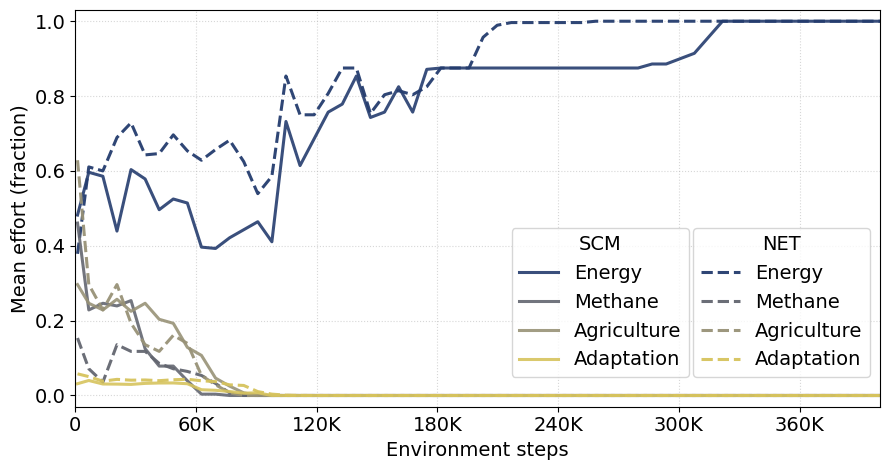

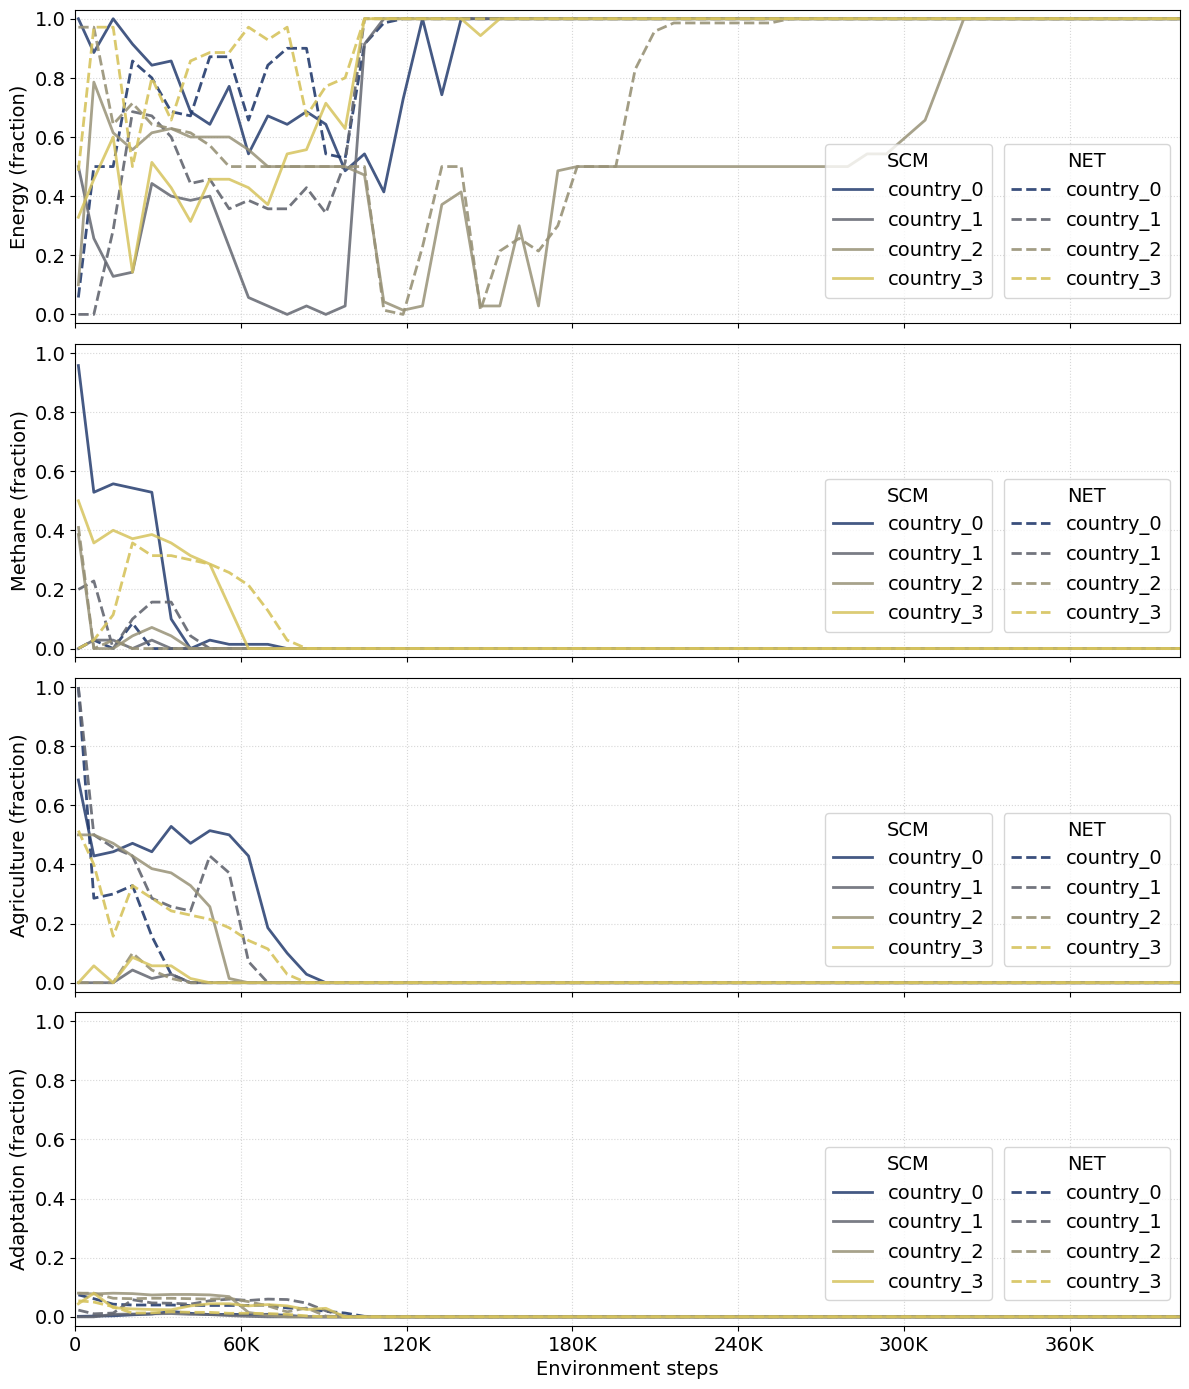

In [22]:
lever_series = {
    "energy": (homogenous_scm_energy,homogenous_tcn_energy),
    "methane": (homogenous_scm_methane,homogenous_tcn_methane),
    "agriculture": (homogenous_scm_agriculture, homogenous_tcn_agriculture),
    "adaptation": (homogenous_scm_adaptation, homogenous_tcn_adaptation),
}

fig, ax = plot_lever_consistency_mean(
    lever_series,
    agent_mask=[1,1,1,1],           # include all agents
    action_mask=[1,1,1,1],          # include all levers
    steps_max=400_000,
    savefig="plots/lever_mean_consistency_tcn_vs_cicero.pdf",
    y_min=-0.03,
    y_max=1.03,
)

plot_lever_consistency(lever_series, 
                                agent_mask=[1,1,1,1],           # include all agents
                                action_mask=[1,1,1,1],          # include all levers
                                 steps_max=400_000,
                                 savefig="plots/per_agent_levers_consistency_tcn_vs_cicero.pdf", 
                                 max_legend_labels=5,
                                 y_min=-0.03,
                                 y_max=1.03)

##### 2.3.3.2 Heterogenous

(<Figure size 1200x1400 with 4 Axes>,
 array([<Axes: ylabel='Energy (fraction)'>,
        <Axes: ylabel='Methane (fraction)'>,
        <Axes: ylabel='Agriculture (fraction)'>,
        <Axes: xlabel='Environment steps', ylabel='Adaptation (fraction)'>],
       dtype=object))

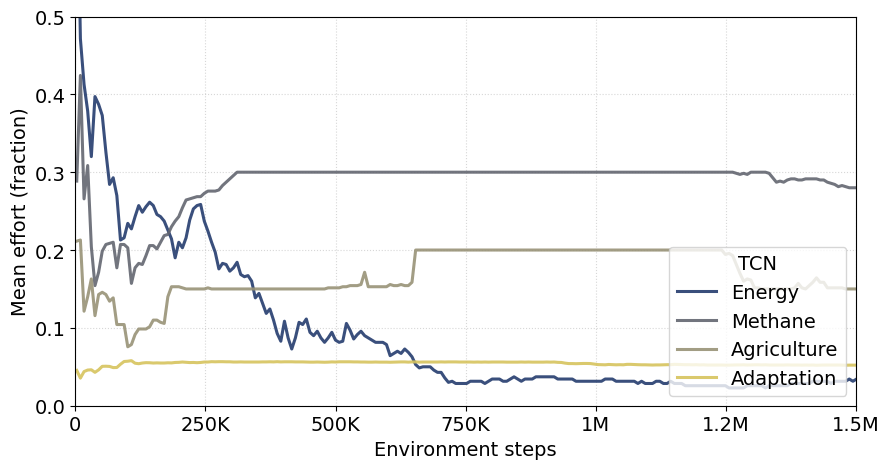

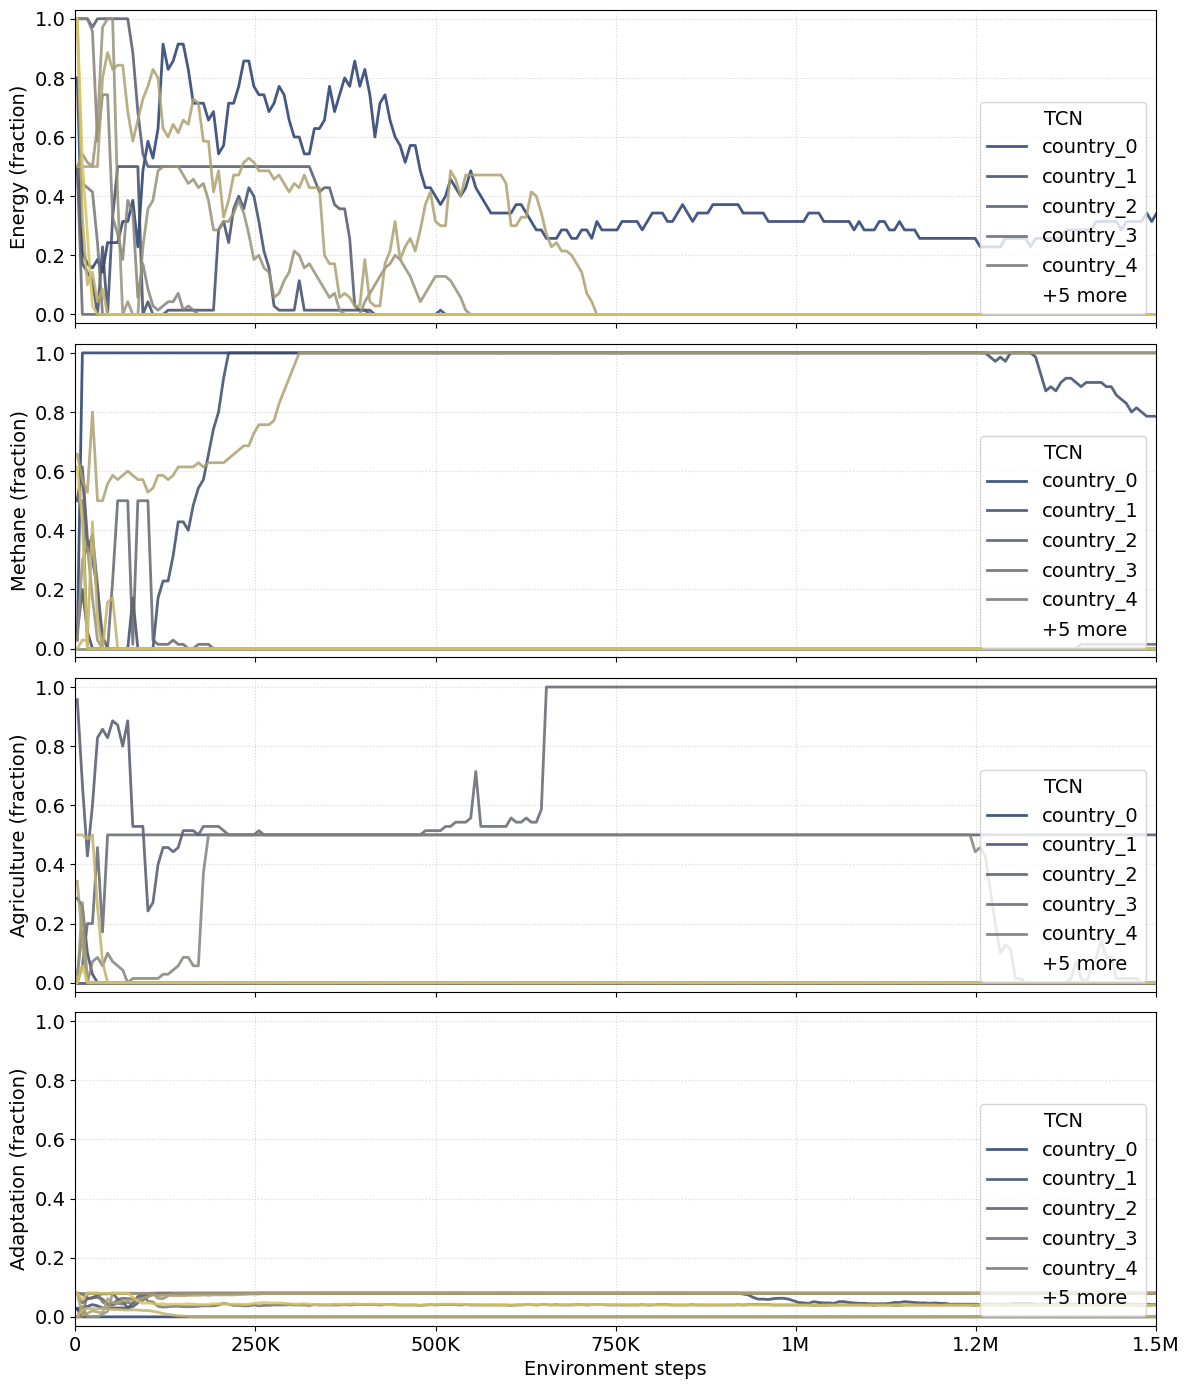

In [23]:
lever_series = {
    "energy": (heterogenous_tcn_energy),
    "methane": (heterogenous_tcn_methane),
    "agriculture": (heterogenous_tcn_agriculture),
    "adaptation": (heterogenous_tcn_adaptation),
}

fig, ax = plot_lever_consistency_mean(
    lever_series,
    agent_mask=[1,1,1,1,1,1,1,1,1,1],           # include all agents
    action_mask=[1,1,1,1],          # include all levers
    steps_max=1_500_000,
    savefig="plots/lever_consistency_tcn_heterogenous.pdf",
    y_min=0,
    y_max=0.5,
    primary_label="TCN"
)

plot_lever_consistency(lever_series, 
                                agent_mask=[1,1,1,1,1,1,1,1,1,1],           # include all agents
                                action_mask=[1,1,1,1],          # include all levers
                                 steps_max=1_500_000,
                                 savefig="plots/per_agent_levers_heterogenous_tcn.pdf", 
                                 max_legend_labels=5,
                                 y_min=-0.03,
                                 y_max=1.03,
                                 primary_label="TCN")